# 代表的なデータ可視化ライブラリ：Matplotlib

書籍中の図を再現するためのNotebook。

なお、サポートサイトに掲載しない内容なので、コメントは少なめ。ご了承ください。

## 準備

In [8]:
# tag:hide
# warningsモジュールのインポート
import warnings

# データ解析や機械学習のライブラリ使用時の警告を非表示にする目的で警告を無視
# 本書の文脈では、可視化の学習に議論を集中させるために選択した
# ただし、学習以外の場面で、警告を無視する設定は推奨しない
warnings.filterwarnings("ignore")

In [9]:
!pip install japanize_matplotlib

In [11]:
from pathlib import Path

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import japanize_matplotlib

In [ ]:
PATH_CE = Path("../../../data/cm/input/cm_ce.csv")

## バージョン確認

In [13]:
matplotlib.__version__

'3.7.2'

## 可視化

In [5]:
df_ce = pd.read_csv(PATH_CE)

In [6]:
# マンガ作品ごとの掲載話数を集計するためのDataFrameを作成
# 'groupby' と 'nunique' を使用して、各マンガ作品ごとにユニークな 'ceid'（掲載話数）を数える
df_bar = df_ce.groupby(["ccname"])["ceid"].nunique().reset_index(name="n_ce")

# 掲載話数が多い順にデータを並び替えて、上位N_CC件のデータを選択
# 'sort_values' でソートし、'head(20)' で上位20件を取得
df_bar = df_bar.sort_values(by="n_ce", ascending=False, ignore_index=True).head(20)

# 可視化のために'rename'メソッドを用いて列名をわかりやすい名前に変更
df_bar = df_bar.rename(columns={"ccname": "マンガ作品名", "n_ce": "合計話数"})

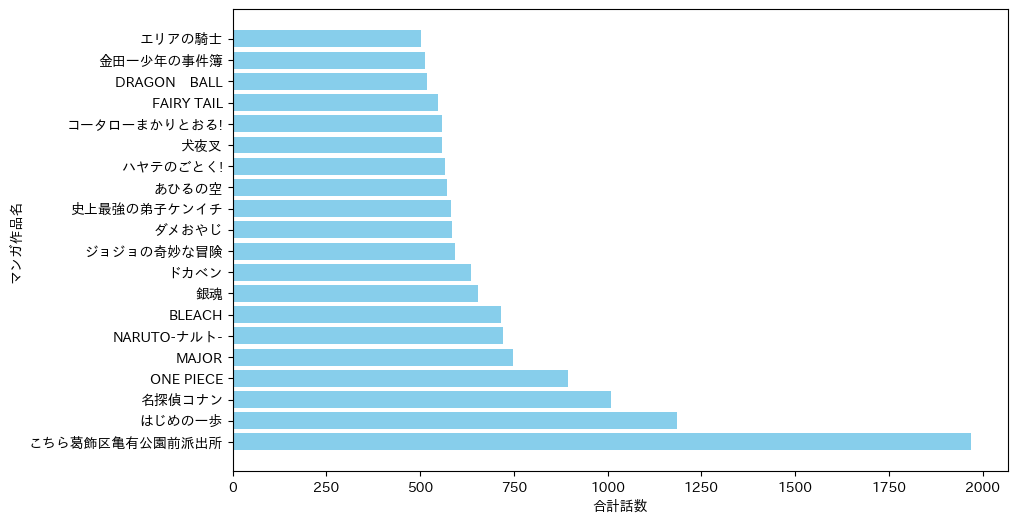

In [7]:
# グラフのサイズを指定
plt.figure(figsize=[10,6])
# 横棒グラフを描画
plt.barh(df_bar['マンガ作品名'], df_bar['合計話数'], color='skyblue')
# Y軸のラベルを設定
plt.ylabel('マンガ作品名')
# X軸のラベルを設定
plt.xlabel('合計話数')
# グラフを表示
plt.show()